# ASSESSMENT 1: CLASSIFICATION

## 1. Business Objectives

To a consumer, the difference between good and bad wine depends on several subjective sensory properties i.e. sweetness. These properties are dictated by chemical compounds such as residual sugar, pH and the relationship between the levels of these compounds. Sweetness of a wine is from the interaction of residual sugar, alcohol and acids. With alcohols and sugars promoting the wines sweetness and acids counteract it. For our case, the wine is described by 11 traits. 

Our objectives are: 
1. Create a model that can accurately predict the quality of wine when presented with value for traits
1. Explain the model.
1. Analyze features in terms of importance.



### 1.1 Assessing the situation

- **Personel** - The study will be conducted by a data specialist. All stages from data acquisition to modelling shall be tasked to the specialit.
- **Data** - The dataset to be used will be from the [UCI ML repository](https://archive.ics.uci.edu/ml/index.php) wine dataset. With focus beign on the <mark>white wine dataset</mark>.
- **Computing Resources** - We will use Google Colab with 4 GB of memory available.
- **Software** - Python 3.6 will be used with extensive use of the pandas, seaborn, matplotlib and scikit libraries.


## 2. Data Understanding

### 2.1 Data Acquisition

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(color_codes= True)

Get our data from a url and look at the first 5 rows

In [2]:
# Fetch our data
wine_df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep= ";")

wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 2.2 Describe our data

In [3]:
wine_df.shape

(4898, 12)

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


We see that the data is comprised of numeric values

In [5]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


None of our variable are highly skewed. All in all our data looks good.

In [6]:
wine_df['quality'] = wine_df['quality'].map({1:'bad',2:'bad',3:'bad',4:'bad',5:'bad',
                                             6:'good',7:'good',8:'good',9:'good',10:'good'})

We map our quality values using the 'good' and 'bad' categories. Values < 6 are bad and the rest are good.

In [18]:
from sklearn.preprocessing import LabelEncoder

wine_df['quality'] = LabelEncoder().fit_transform(wine_df['quality'])

We encode our categories as 0 for 'bad' and 1 for 'good'

<AxesSubplot:xlabel='quality', ylabel='count'>

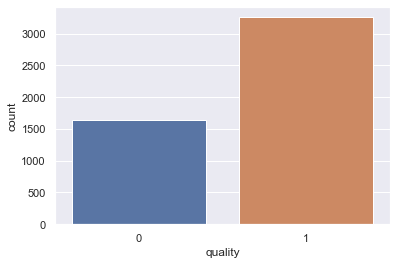

In [19]:
sns.countplot(data=wine_df,x='quality')

We see there is an imbalance betweeen out two classes. With the 'bad'(0) class having only half of the observations of the 'good' (1) class. 

### 2.3 Verify Data

In [20]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We have no missing values.

### 2.4 Exploratory Data Analysis

It was mentioned that a property like sweetness depends on variables like alcohol, sugar and acidity. Given this knowledge we will develop a pseudo-hypothesis and investigate whether sweet wine is synonymous with quality. We also assume that alcohol is a signiicant contributor to the quality of wine.

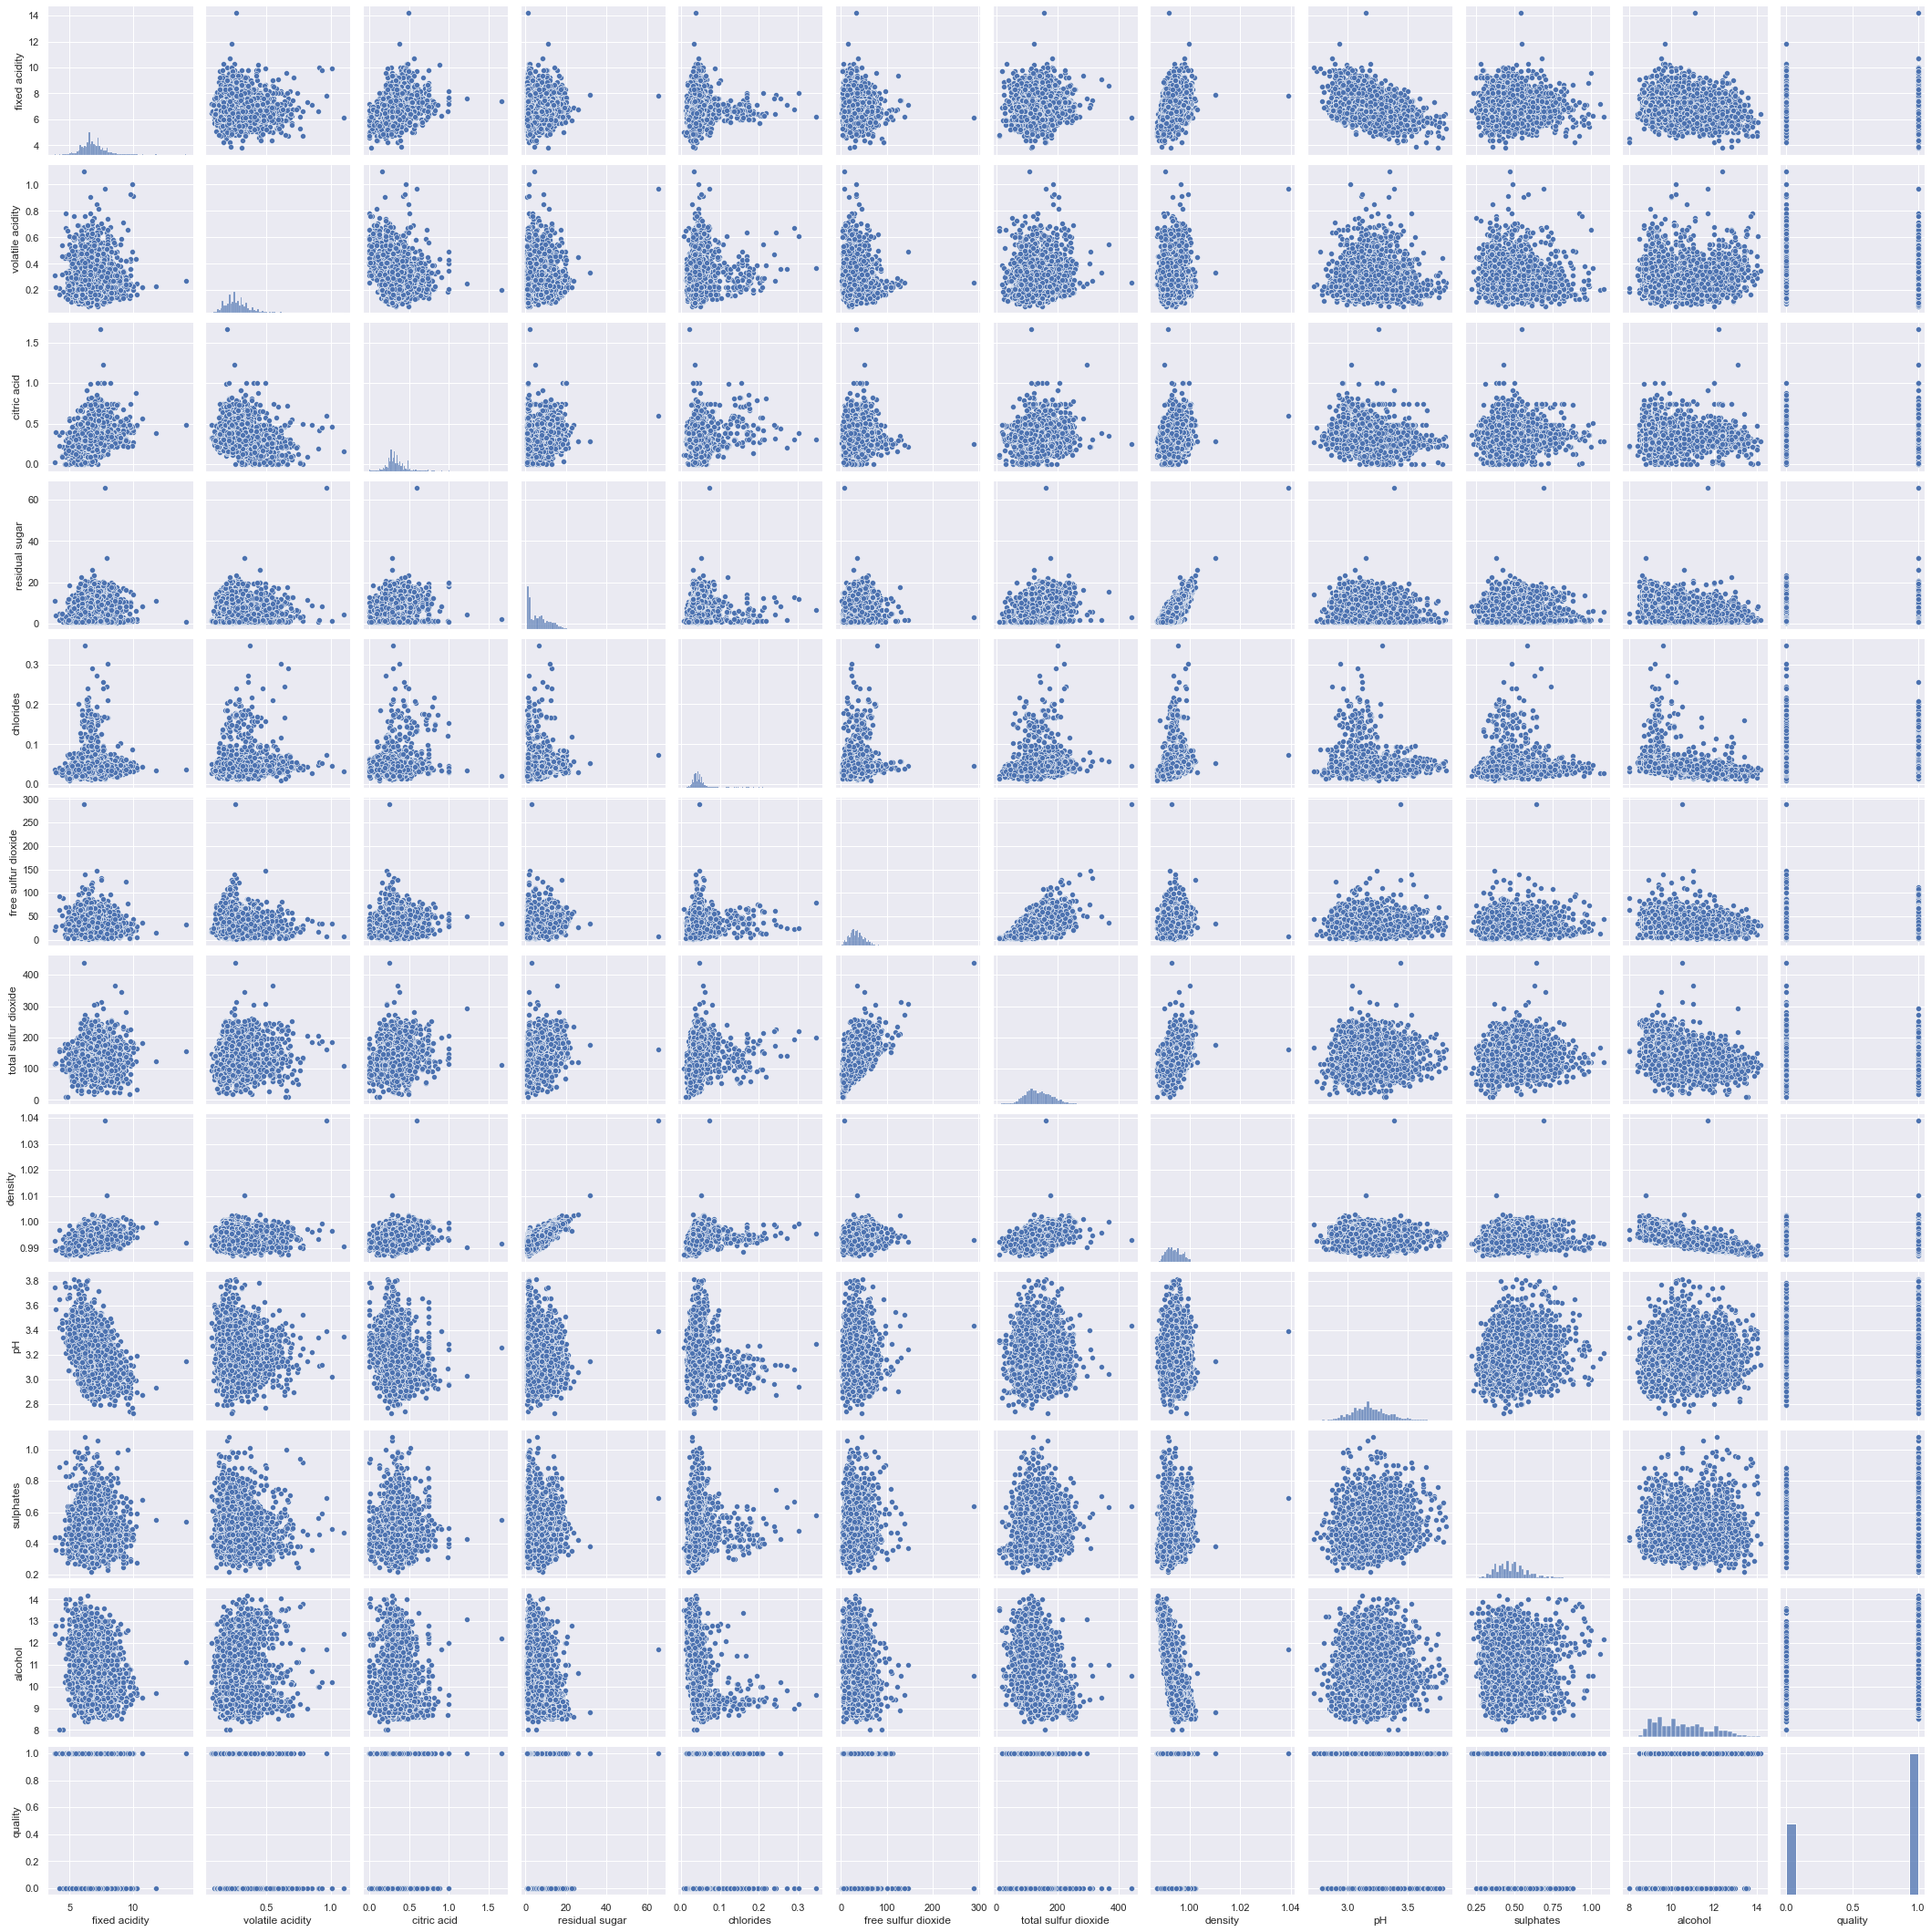

In [21]:
sns.pairplot(wine_df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

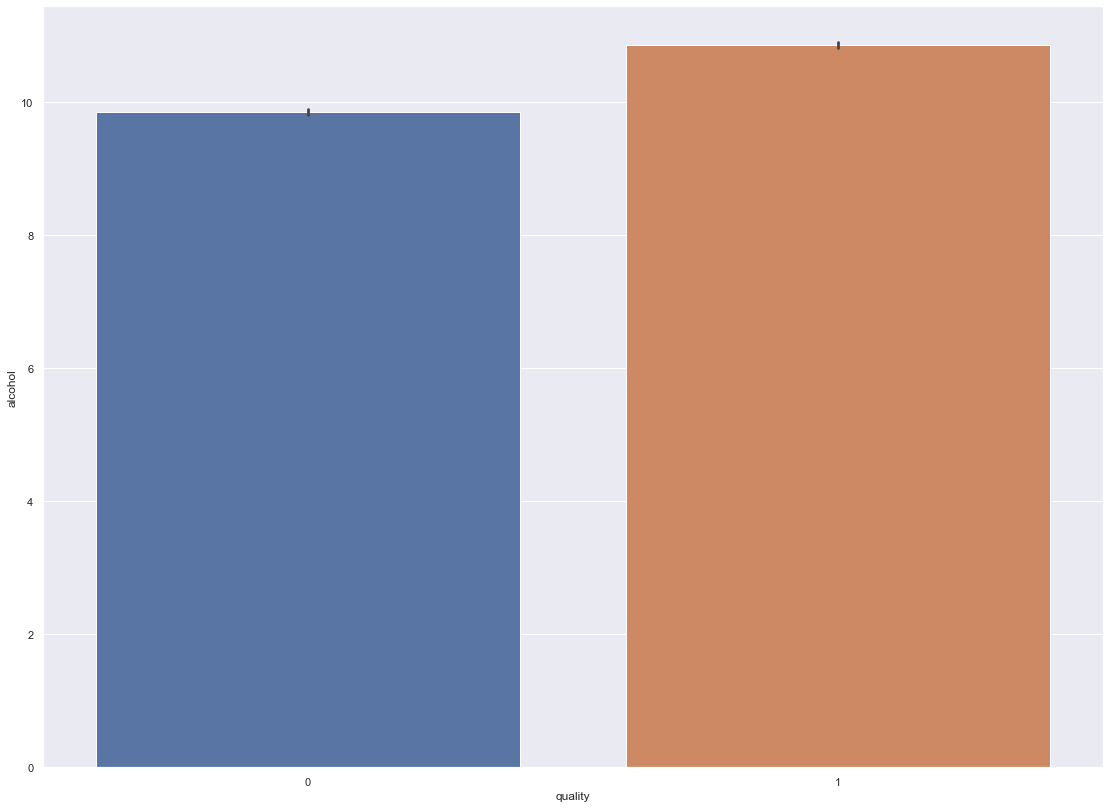

In [23]:
fig = plt.figure(figsize=(19, 14))
sns.barplot(data=wine_df,x='quality', y='alcohol')

We start by analysing the relationship between alcohol and quality. Our observation is that high alcohol quantities result in better quality.

<AxesSubplot:xlabel='alcohol', ylabel='residual sugar'>

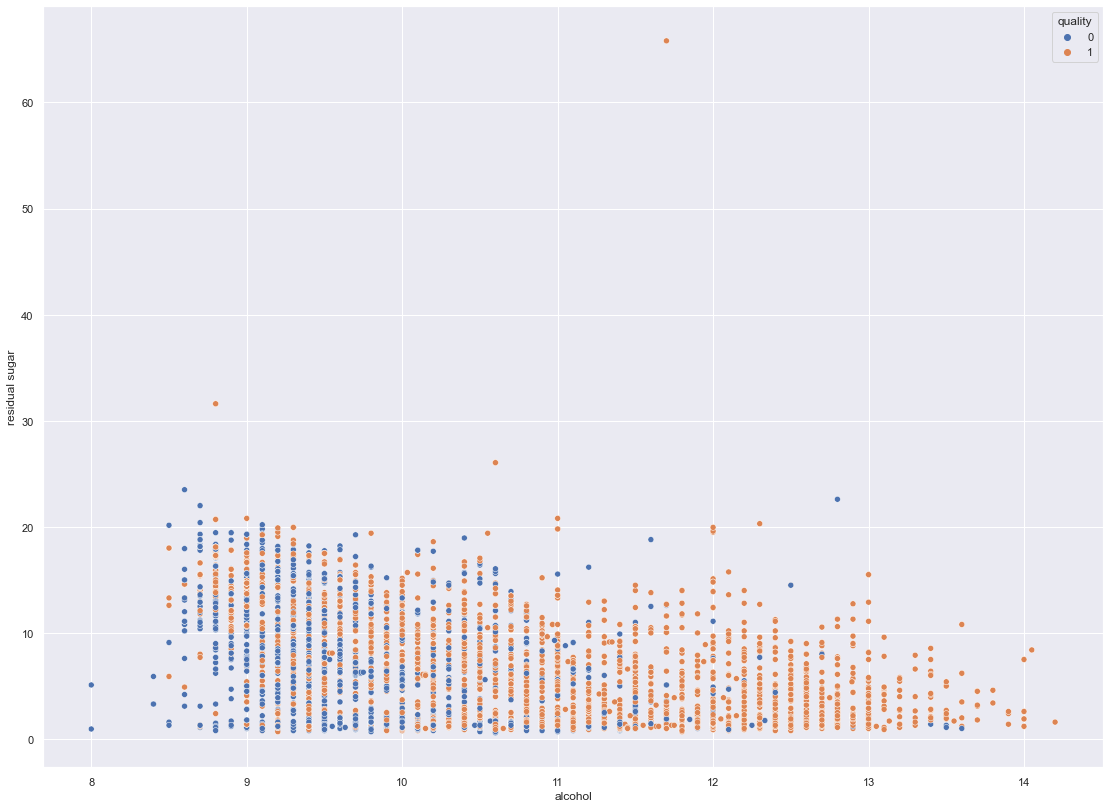

In [24]:
fig = plt.figure(figsize=(19, 14))
sns.scatterplot(data=wine_df, x='alcohol',y='residual sugar', hue='quality')

When we analyze the relationship between alcohol and residual sugar we see a negative correlation. We also observe that our good wine has more alcohol and less sugar

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

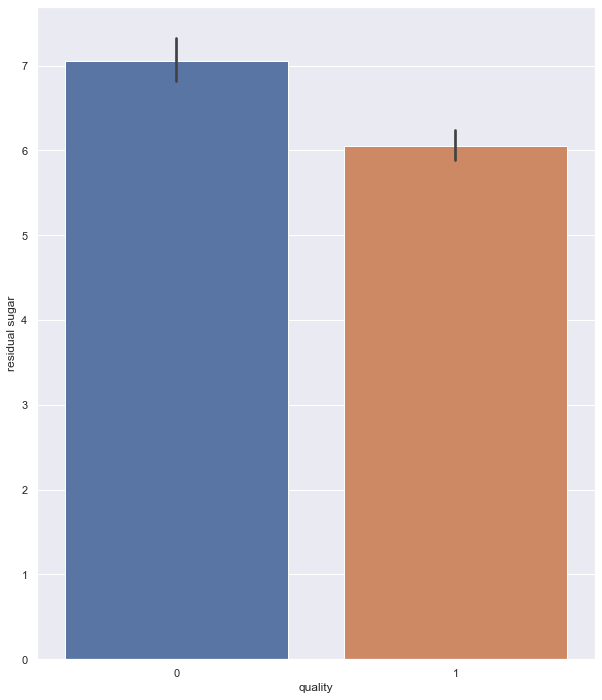

In [25]:
fig = plt.figure(figsize=(10, 12))
sns.barplot(data=wine_df, x='quality',y='residual sugar')

It is no surprise that high quality wine has the least amount of residual sugar.

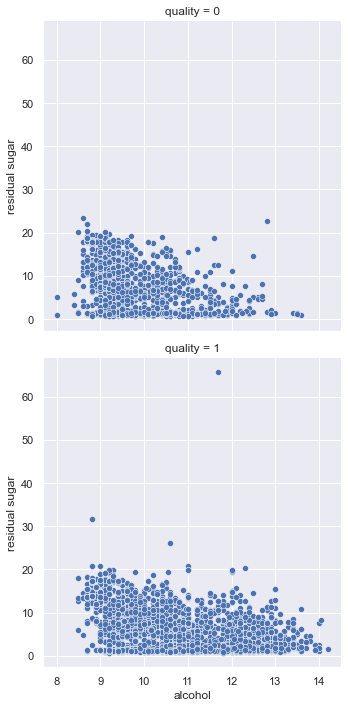

In [26]:
sns.relplot(data=wine_df, x='alcohol', y='residual sugar', row='quality', sizes=(15,50))

We can visualize how relationships between alcohol and residual sugar vary for every output of quality.

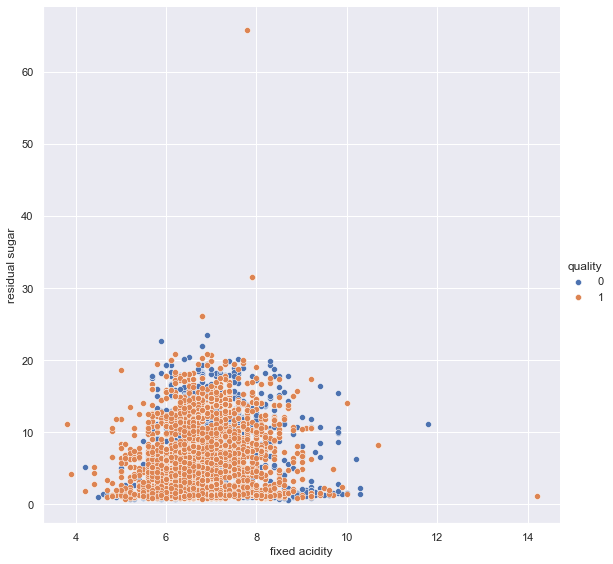

In [28]:
g = sns.FacetGrid(wine_df, hue="quality", height=8)
g.map(sns.scatterplot, "fixed acidity", "residual sugar")
g.add_legend()


We go a step further and visualize how residual sugar, fixed acidity and quality relate. It looks like the answer to our question is no. Wine that is too sweet is not necessarily quality wine. It is suggested that a balance between sweetness and sourness is better. 

Our model should be able to interpret such relationships.

## 3. Data preparation

### 3.1 Selecting data

To begin with, we will use all feature in the initial model. After generating the model we will utilise Recursive Feature Elimination (RFE) for fature selection in the next iteration


In [32]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()

In [36]:
from sklearn.model_selection import train_test_split

data = wine_df.values # Read our values into an array
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42) 

# Remove outliers
#yhat = lof.fit_predict(X_train)
#mask = yhat != -1
#X_train = X_train[mask, :]


We read our data into an array, removing the columns. Split it into an array of independent variable (X) and dependent variable (y). Then we create our test and train sets for our model. We then remove outliers in our training sets.

## 4. Modelling

### 4.1 Importing the model

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

We will use the Decision Tree Classifiers model from scikit-learn and evaluate the performance of our model using accuracy score and classification report

### 4.2 Model assumptions.

### 4.3 Build Model

In [37]:
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train,y_train)
# evaluate the model
y_pred = model.predict(X_test)


# evaluate predictions
print("Confusion Matrix: ",
      confusion_matrix(y_test, y_pred))

print("Accuracy : ",
      accuracy_score(y_test, y_pred)*100)

print("Report : ",
      classification_report(y_test, y_pred))


Confusion Matrix:  [[245 280]
 [137 955]]
Accuracy :  74.21150278293135
Report :                precision    recall  f1-score   support

         0.0       0.64      0.47      0.54       525
         1.0       0.77      0.87      0.82      1092

    accuracy                           0.74      1617
   macro avg       0.71      0.67      0.68      1617
weighted avg       0.73      0.74      0.73      1617



We build a linear regression with default parameters and calculate root-mean-squared-error for our regression loss.

### 4.4 Assess Model

In [147]:
test_df = pd.DataFrame(y_test).set_axis(['test'], axis=1)

pred_df = pd.DataFrame(y_pred).set_axis(['prediction'], axis=1)

print(test_df.head(10), '\n')
print(pred_df.head(10))



   test
0   7.0
1   8.0
2   8.0
3   5.0
4   7.0
5   6.0
6   5.0
7   4.0
8   6.0
9   5.0 

   prediction
0    6.326260
1    6.425453
2    6.407127
3    5.746885
4    6.402751
5    6.352692
6    5.171874
7    5.480649
8    6.010001
9    5.202446


Our model is not performing particularly well. The RMSE value is 0.754 which is particularly high and the R2 score is 0.25 which is low. The model fails to be satisfactory and should be considered a poor model 

## 5. Evaluate

We were able to partially answer our business objectives. Through the exploratory analysis we observed how the independent variables related with each other and with the dependent variable. However, when developing our model we see it fail to predict accurately. 

This failure was expected as it was speculated that the linear regression model may be insufficient for the problem. We visualize the failure of our model above. By looking at the test output and predictions we see that our prediction value are continous. This explains why our error calculations are high.

For better prediction results classification models should be considered.